In [ ]:
!pip3 uninstall -y opencv-contrib-python 
!pip3 uninstall -y opencv-python

!pip3 install opencv-contrib-python
!pip3 install opencv-python

Found existing installation: opencv-contrib-python 4.5.5.64
Uninstalling opencv-contrib-python-4.5.5.64:
  Successfully uninstalled opencv-contrib-python-4.5.5.64
Found existing installation: opencv-python 4.5.5.64
Uninstalling opencv-python-4.5.5.64:
  Successfully uninstalled opencv-python-4.5.5.64
  Using cached opencv_contrib_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (66.7 MB)
  Using cached opencv_python-4.5.5.64-cp36-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (60.5 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [ ]:
!wget -c https://i.imgur.com/K74Rsq2.jpg -O painting.jpg
!wget -c https://i.imgur.com/HnwPrgi.jpg -O painting_in_life.jpg

--2022-04-11 08:17:17--  https://i.imgur.com/K74Rsq2.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.76.193
Connecting to i.imgur.com (i.imgur.com)|199.232.76.193|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2022-04-11 08:17:17--  https://i.imgur.com/HnwPrgi.jpg
Resolving i.imgur.com (i.imgur.com)... 199.232.76.193
Connecting to i.imgur.com (i.imgur.com)|199.232.76.193|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.



In [ ]:
import cv2 as cv
import sys
import io
import numpy as np
import pandas as pd
from PIL import Image
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
import imutils
from google.colab.patches import cv2_imshow

In [ ]:
def sift(img1, img2):


  sift_detector = cv.SIFT_create()
  
  keypoints1, descriptions1 = sift_detector.detectAndCompute(img1, None)
  keypoints2, descriptions2 = sift_detector.detectAndCompute(img2, None)


  return keypoints1, descriptions1, keypoints2, descriptions2


In [ ]:
def brute_force_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2):
    bf = cv.BFMatcher(cv.NORM_L1)
    matches = bf.knnMatch(descs1,descs2, k=2)   

    good = []
    for m,n in matches:
        if m.distance < 0.75*n.distance:
            good.append([m])

    img3 = cv.drawMatchesKnn(img1, kps1, img2, kps2, good[1:20], None, flags=2)
    plt.figure(figsize=(20,20))
    plt.imshow(img3) 
    plt.show()

In [ ]:
img1  = cv.imread('/content/king_shine.jpeg', cv.IMREAD_GRAYSCALE)
img2 = cv.imread('/content/king_shine_with_another.jpg', cv.IMREAD_GRAYSCALE)

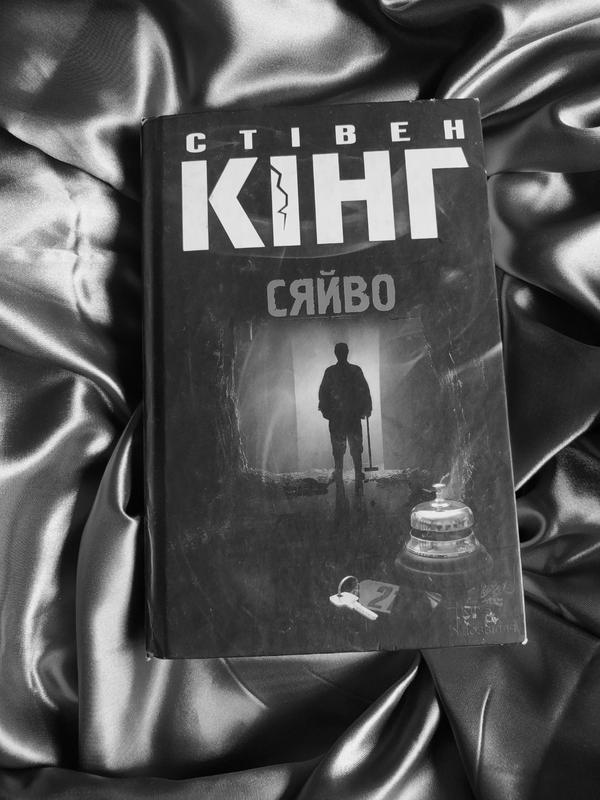

In [ ]:
cv2_imshow(img1)

In [ ]:
kps1, descs1, kps2, descs2 = sift(img1, img2)

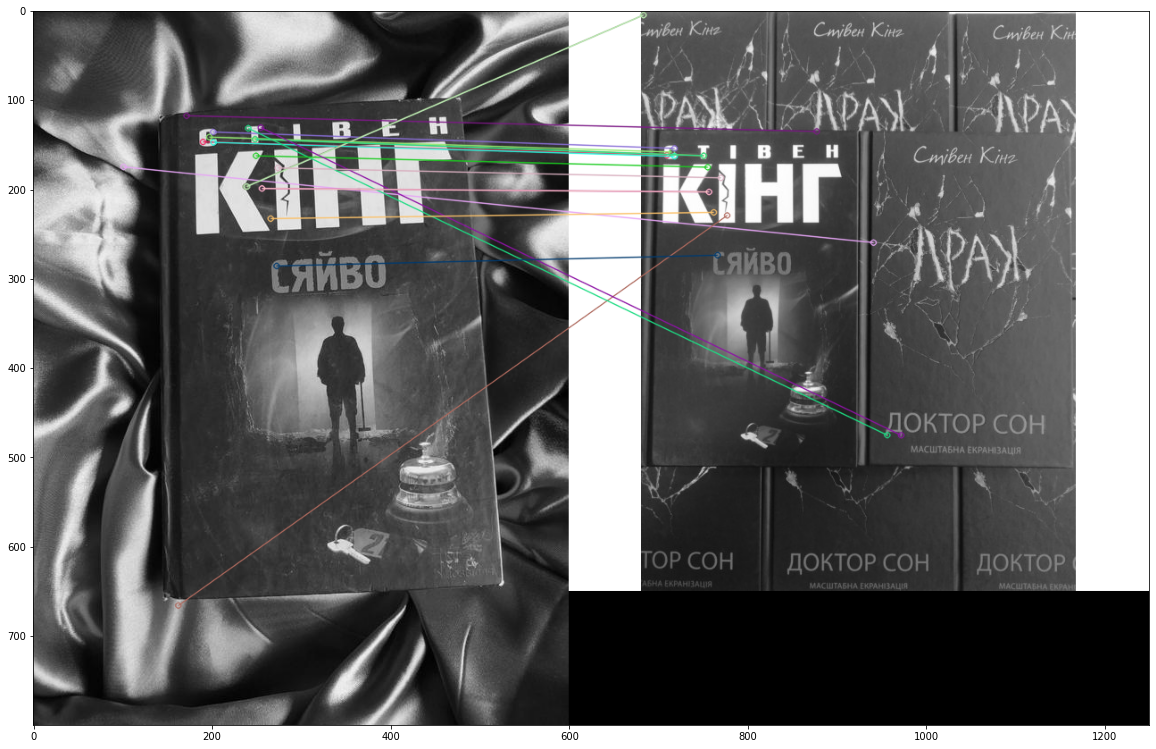

In [ ]:
brute_force_opencv_matcher(kps1, descs1, kps2, descs2,img1, img2)

In [ ]:
def matcher(kp1, des1, kp2, des2, img1, img2):
    matches = []
    for i, k1 in enumerate(des1):
        for j, k2 in enumerate(des2):
            matches.append(cv.DMatch(_distance=np.linalg.norm(k1 - k2), _imgIdx=0, _queryIdx=i, _trainIdx=j))

    matches = sorted(matches, key=lambda x: x.distance)

    img3 = cv.drawMatches(img1, kp1, img2, kp2, matches[:10], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return img3

In [ ]:
def draw_my_matches(img):

  plt.figure(figsize=(20,20))
  plt.imshow(img) 
  plt.show()

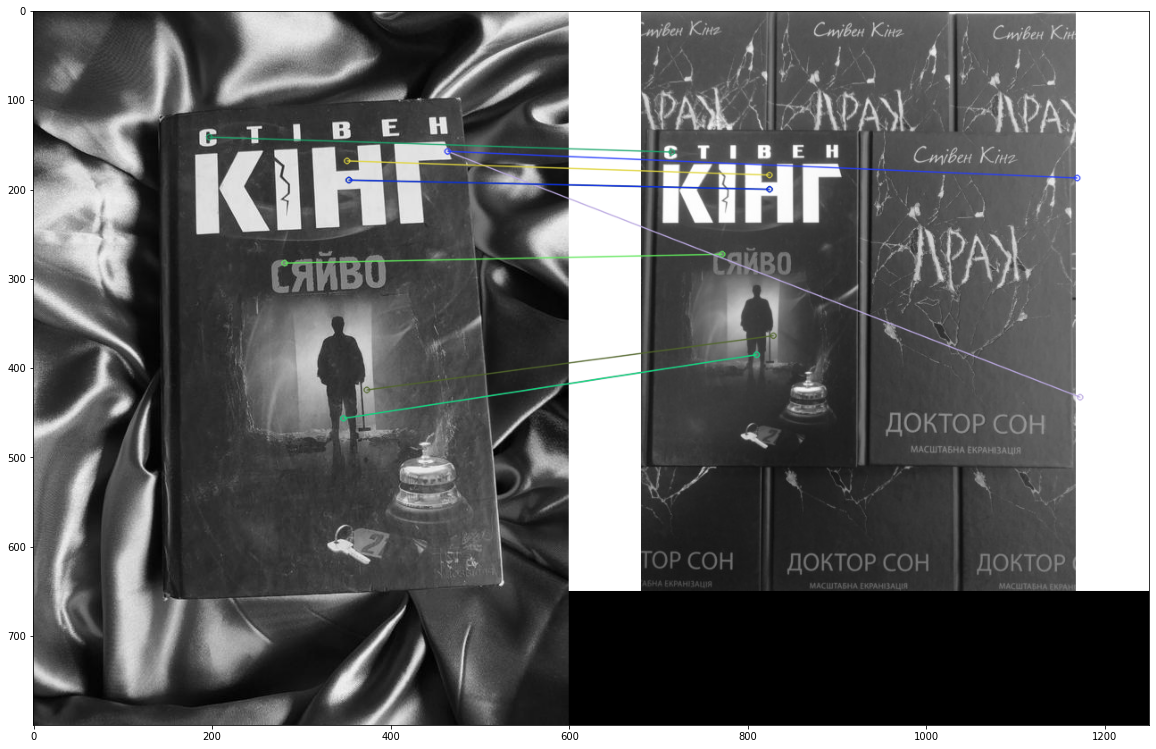

In [ ]:
img_answer = matcher(kps1, descs1, kps2, descs2,img1, img2)
draw_my_matches(img_answer)


In [ ]:
img3 = cv.imread('painting.jpg', cv.IMREAD_GRAYSCALE)  # queryImage
img4 = cv.imread('painting_in_life.jpg', cv.IMREAD_GRAYSCALE)  # trainImage

In [ ]:
kps3, descs3, kps4, descs4 = sift(img3, img4)

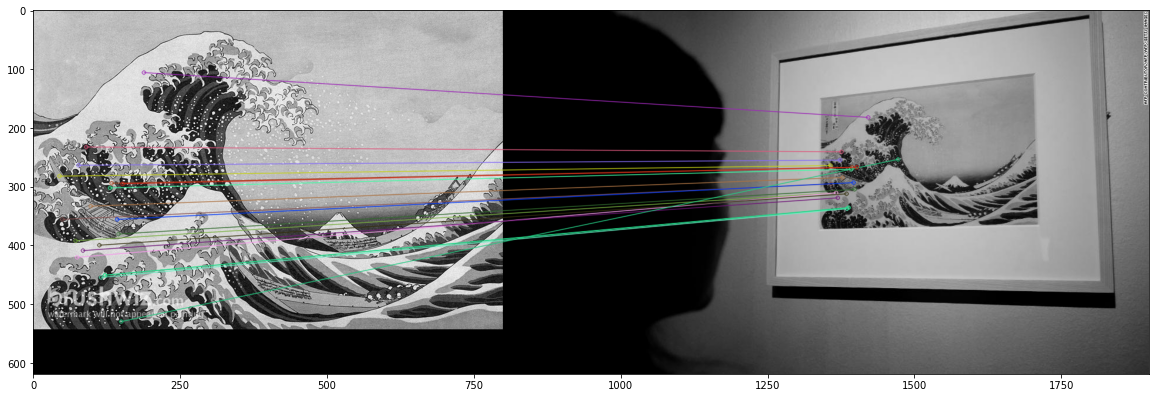

In [ ]:
brute_force_opencv_matcher(kps3, descs3, kps4, descs4, img3, img4)

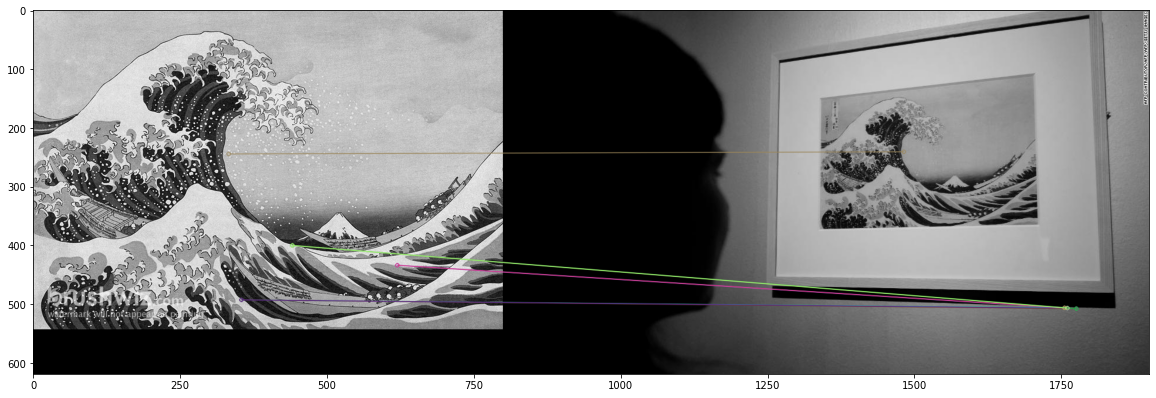

In [ ]:
img_answer1 = matcher(kps3, descs3, kps4, descs4, img3, img4)
draw_my_matches(img_answer1)


In [ ]:
img5 = cv.imread('boom.jpg', cv.IMREAD_GRAYSCALE)  # queryImage
img6 = cv.imread('choc.png', cv.IMREAD_GRAYSCALE)  # trainImage

In [ ]:
kps5, descs5, kps6, descs6 = sift(img5, img6)

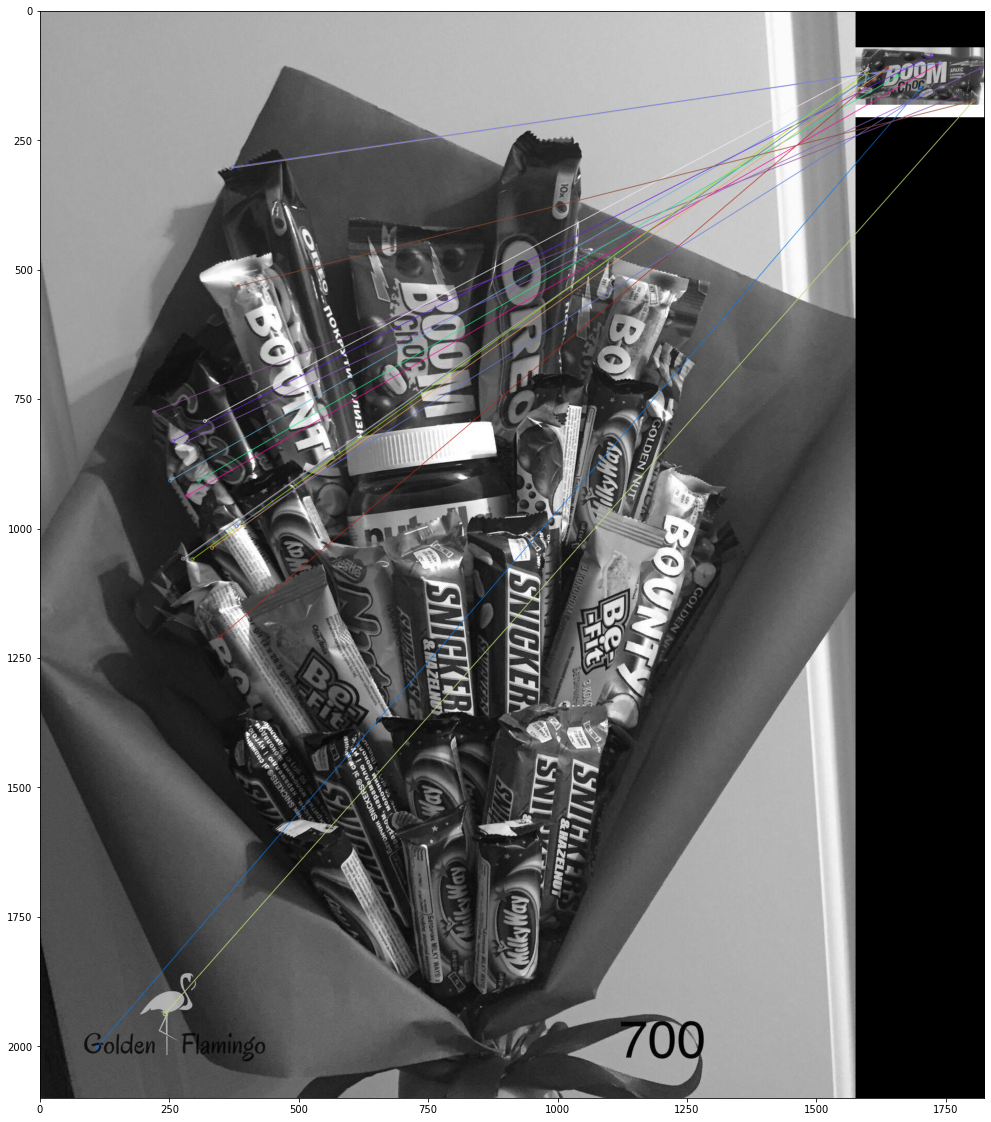

In [ ]:
brute_force_opencv_matcher(kps5, descs5, kps6, descs6,img5, img6)

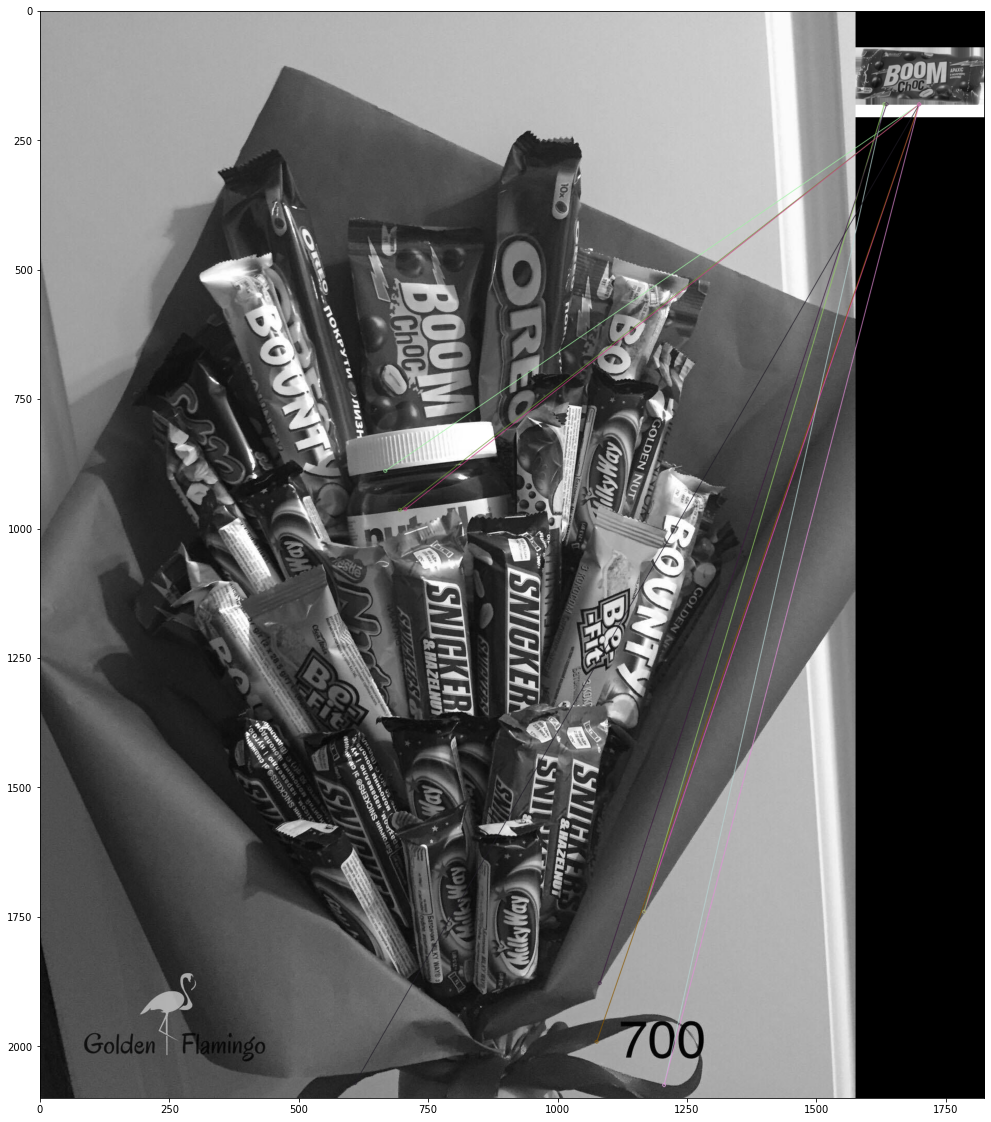

In [ ]:
img_answer1 = matcher(kps5, descs5, kps6, descs6,img5, img6)
draw_my_matches(img_answer1)
